In [ ]:
import sys
sys.path.append('/home/wangs/rs/lib')
import ff

名称: accelerated_turnover_rank_RC\
来源: 20240316-华安证券-量化研究系列报告之十五：加速换手因子，“适逢其时”的换手奥秘\   
作者: RC\
构造方法:\
1. 构建思路：个股择时信号 + 换手变化 = 特殊时刻的加速换手因子
2. 构建辅助因子：i、加速换手因子:计算每只股票相对前一日换手率的变化值，并且计算该变化值的 20 日(N2)平均作为因子值           
ii、日振幅指标：定义为当日最高价减最低价，除以昨日收盘价
3. 择时信号：i、定义当日收盘价大于过去 3 日(N1)平均值的日期为“上涨日”，当日收盘价小于过去 3 日平均值的日期为“下跌日”；           
ii、当日成交量大于过去 3 日平均值的日期为“放量日”，当日成交量小于过去 3 日平均值的日期为“缩量日”；            
iii、定义当日振幅大于过去 3 日平均值的日期为“高振幅日”，当日振幅小于过去3 日平均值的日期为“低振幅日”；
4. 计算方式：i、平均值：计算个股日加速换手和行业成分股加速换手平均值的差值，并除以当日成分股加速换手的标准差，将其作为系数对每日的因子进行调整            
ii、最小值：计算个股日加速换手和行业成分股加速换手最小值的差值，并除以当日成分股加速换手的标准差，将其作为系数对每日的因子进行调整           
iii、平稳：对加速换手进行时序标准化处理，改进步骤为将每日的换手率变化量除以其过去 20（n） 日换手率变化量的标准差
5. 通过上述方式计算：放量上涨日最小加速换手偏离、放量上涨日平均加速换手偏离、放量上涨日最小平稳加速换手偏离、放量上涨日平均平稳加速换手偏离、高振幅日最小加速换手偏离、高振幅日平均加速换手偏离、高振幅日最小平稳加速换手偏离、高振幅日平均平稳加速换手偏离            
举例：放量上涨日最小平稳加速换手偏离：对过去20日中的放量上涨日的平稳化后的加速换手因子乘以最小值计算方式的系数调整，求和，得到放量上涨日最小平稳加速换手偏离因子
6. 因子融合：将上述8个因子，以排序的方式进行融合，最小值权重为1，均值权重为-1，将排序值等权求平均得到最终因子

long normal
持仓模式： 普通模式
持仓周期： 1
仓位数：   100
排序:      正序
回测部分：
回测仓位数： 100
回测手续费： 0
交易模式： t日收盘价买入，收盘价卖出
002169.SZ 20240422 nan
000912.SZ 20240422 nan
002084.SZ 20240422 nan
002294.SZ 20240422 nan
002287.SZ 20240422 nan
003010.SZ 20240422 nan
000851.SZ 20240422 nan
002271.SZ 20240422 nan
002090.SZ 20240422 nan
000026.SZ 20240422 nan
002610.SZ 20240422 nan
002489.SZ 20240422 nan
001270.SZ 20240422 nan
002101.SZ 20240422 nan
002034.SZ 20240422 nan
002226.SZ 20240422 nan
002096.SZ 20240422 nan
002347.SZ 20240422 nan
002031.SZ 20240422 nan
000635.SZ 20240422 nan
002852.SZ 20240422 nan
000402.SZ 20240422 nan
000756.SZ 20240422 nan
002065.SZ 20240422 nan
002996.SZ 20240422 nan
000586.SZ 20240422 nan
002219.SZ 20240422 nan
000566.SZ 20240422 nan
002174.SZ 20240422 nan
002897.SZ 20240422 nan
002349.SZ 20240422 nan
002644.SZ 20240422 nan
002390.SZ 20240422 nan
002224.SZ 20240422 nan
002909.SZ 20240422 nan
002879.SZ 20240422 nan
002292.SZ 20240422 nan
002108.SZ 20240422 nan
000062.SZ 20240422 nan
002

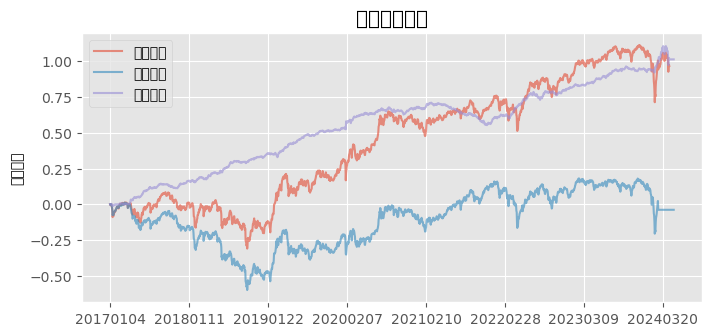

,指数收益,超额收益,策略收益
年化收益率,-0.005,0.142,NaN
年化波动率,0.214,0.076,0.233
夏普率,-0.025,1.868,NaN
最大回撤,-0.612,-0.158,-0.400
收益回撤比,-0.009,0.899,NaN
胜率,0.519,0.551,0.552
盈亏比,0.920,1.188,0.886


In [10]:
p = ff.run((accelerated_turnover_rank_RC*ff.filter0).loc[:'20240420'], positions=100, period=1, fees=0)

In [6]:
accelerated_turnover_rank_RC = ff.read('accelerated_turnover_rank_RC')

In [13]:
(accelerated_turnover_rank_RC*ff.filter0).loc[:,:'20240420']

,20100104,20100105,20100106,20100107,20100108,20100111,20100112,20100113,20100114,20100115,...,20240408,20240409,20240410,20240411,20240412,20240415,20240416,20240417,20240418,20240419
000001.SZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-844.0,-1075.0,-813.0,-4.0,-1231.0,-621.0,826.0,-2427.0,1163.0,3718.0
000002.SZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1535.0,-1552.0,-1520.0,-1904.0,-1939.0,-1447.0,911.0,1703.0,1664.0,1555.0
000004.SZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2338.0,2301.0,2370.0,3021.0,3555.0,2788.0,-224.0,-2078.0,-771.0,-1458.0
000005.SZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000006.SZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2614.0,-2391.0,-2406.0,-222.0,-333.0,93.0,1582.0,1929.0,1644.0,1456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873706.BJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
873726.BJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
873806.BJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
873833.BJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
